                   Московский Авиационный Институт  
                                  (Национальный Исследовательский Университет)  



Кафедра 806 «Вычислительная математика и программирование»  
Институт: «Информационные технологии и прикладная математика»  
Дисциплина: «Разработка ПО для высокопроизводительных систем»        



                                        -------------------------------
                                        Лабораторная работа по Pandas №3  
                                        -------------------------------    



                                                                            Группа: М8О-103М-20  
                                                                            Студент: Машкевич Илья Константинович  
                                                                            Преподаватель: Поповкин Александр Викторович 

Импорт библиотек

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Найти евклидово расстояние между двумя объектами Series

In [3]:
s1 = pd.Series(np.random.randint(1, 5, 5))
s2 = pd.Series(np.random.randint(1, 5, 5))
eucDistance = np.linalg.norm(s1 - s2)
print(s1)
print(s2)
print(eucDistance)

0    1
1    1
2    3
3    4
4    1
dtype: int32
0    2
1    3
2    3
3    4
4    3
dtype: int32
3.0


Найти индексы локальных максимумов в объекте Series

[3 8 8 8 2 5 0 3 8 9]


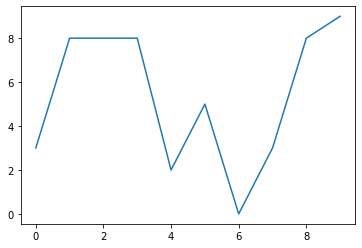

[-1  0 -1  2 -2  2  0  0]
[5]


In [4]:
s = pd.Series(np.random.randint(0, 10, 10))
print(s.values)
plt.plot(s.index, s.values)
plt.show()
extr = np.diff(np.sign(np.diff(s)))
print(extr)
indexes = np.where(extr == -2)[0] + 1
print(indexes)

Заменить пробелы наименее часто встречающимся символом

In [6]:
testString = 'карл у клары украл кораллы'
s = pd.Series(list(testString))

symbolsFreq = s.value_counts()
print(symbolsFreq)
testString = ''.join(s.replace(' ', symbolsFreq.index[-1]))
print(testString)

л    5
а    4
к    4
     4
р    4
ы    2
у    2
о    1
dtype: int64
карлоуокларыоукралокораллы


Создать объект Series, который содержит в индексах даты выходных дней субботы, а в значениях случайные числа от 1 до 10

In [9]:
s = pd.Series(np.random.randint(1, 10, 15), pd.date_range('2020-05-01', periods = 15, freq = 'W-'))
s

2020-05-02    9
2020-05-09    6
2020-05-16    6
2020-05-23    6
2020-05-30    5
2020-06-06    5
2020-06-13    1
2020-06-20    7
2020-06-27    7
2020-07-04    8
2020-07-11    6
2020-07-18    3
2020-07-25    6
2020-08-01    9
2020-08-08    9
Freq: W-SAT, dtype: int32

Заполнить пропущенные даты значением выше (заполненной даты)

In [11]:
filledDates = pd.Series([1, 2, 3], index = pd.to_datetime(['2020-05-01', '2020-05-05', '2020-05-09']))
print(filledDates)
allDates = list(filledDates.resample('D'))
print(allDates)

2020-05-01    1
2020-05-05    2
2020-05-09    3
dtype: int64
[(Timestamp('2020-05-01 00:00:00', freq='D'), 2020-05-01    1
dtype: int64), (Timestamp('2020-05-02 00:00:00', freq='D'), Series([], dtype: int64)), (Timestamp('2020-05-03 00:00:00', freq='D'), Series([], dtype: int64)), (Timestamp('2020-05-04 00:00:00', freq='D'), Series([], dtype: int64)), (Timestamp('2020-05-05 00:00:00', freq='D'), 2020-05-05    2
dtype: int64), (Timestamp('2020-05-06 00:00:00', freq='D'), Series([], dtype: int64)), (Timestamp('2020-05-07 00:00:00', freq='D'), Series([], dtype: int64)), (Timestamp('2020-05-08 00:00:00', freq='D'), Series([], dtype: int64)), (Timestamp('2020-05-09 00:00:00', freq='D'), 2020-05-09    3
dtype: int64)]


Вычислить автокорреляцию объекта Series

In [166]:
n = 16
 
s = pd.Series(np.random.randint(0, 8, n))
print(s)

autocorr = [s.autocorr(lag = i) for i in range(n // 4)]
print(autocorr)

0     4
1     2
2     7
3     6
4     2
5     5
6     4
7     2
8     3
9     6
10    2
11    4
12    4
13    2
14    0
15    6
dtype: int32
[1.0, -0.22646007257119813, -0.36448230574558627, 0.451376310962561]
